In [1]:
%load_ext autoreload
%autoreload 2

In [95]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
from torchvision.models.segmentation import deeplabv3_resnet101
from torchvision.models.segmentation.deeplabv3 import DeepLabHead

from utils import image as imagetils
from nnet import dataloader
from nnet.model import create_model

In [97]:
model = create_model(6)
model.load_state_dict(torch.load('./trained_models/model_1630111077.pt'))
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [98]:
im_preproc = dataloader.image_preprocess_transforms_generator()
lab_preproc = dataloader.labels_preprocess_transforms_generator()
val_data = dataloader.VaihingenDataset(
    './proc_data/proc_data.json', 
    x_transform=im_preproc,
    y_transform=lab_preproc,
    split='val')

In [125]:
unnorm = imagetils.UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

767


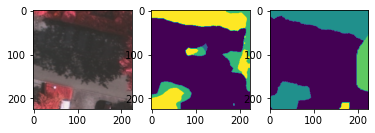

_____________
164


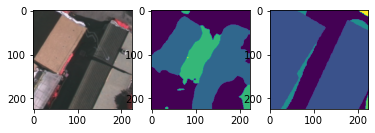

_____________
68


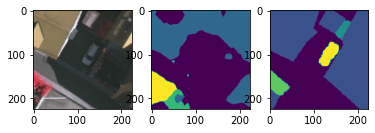

_____________
363


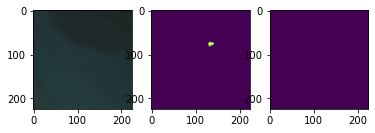

_____________
451


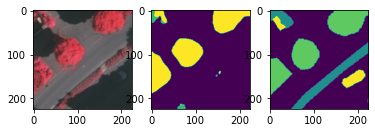

_____________
841


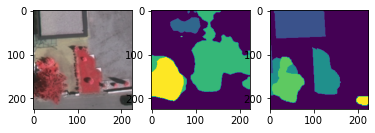

_____________
901


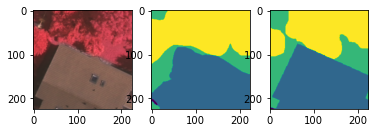

_____________
14


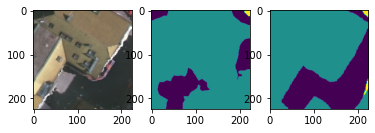

_____________
838


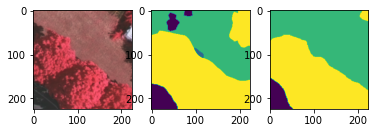

_____________
853


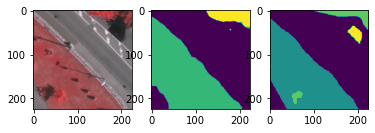

_____________


In [127]:
for i in np.random.choice(np.arange(val_data.__len__()), 10):
    print(i)
    im, lab = val_data.__getitem__(i)
    output = model(im.unsqueeze(0))

    pred = torch.nn.Softmax(dim=0)(output['out'][0].cpu())
    pred_proc = np.argmax(pred.detach().numpy(), axis=0)
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(imagetils.torch_to_numpy(unnorm(im)))

    plt.subplot(1,3,2)
    plt.imshow(pred_proc)

    plt.subplot(1,3,3)
    plt.imshow(imagetils.torch_to_numpy(lab))
    plt.show()
    print('_____________')

